In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("idk_final.csv")
g_features = []
g_target = []
count  = 0
count_g = 0
count_n = 0
for i in range(len(df)):
    if df["status"][i] == 2:
        if count < 700 :
            g_target.append(1)
            g_features.append([df["cataract"][i],df["other"][i]])
            count = count + 1
            
    elif df["status"][i] == 0 :
        if count_g < 350 :
            g_target.append(0)
            g_features.append([df["cataract"][i],df["other"][i]])
            count_g = count_g + 1

    elif df["status"][i] == 1 :
        if count_n < 350 :
            
            g_target.append(0)
            g_features.append([df["cataract"][i],df["other"][i]])
            count_n = count_n + 1
        

print(f'Select: {len(g_features)} set')
g_features = np.array(g_features)
g_target = np.array(g_target)

Select: 1400 set


Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.7232142857142857
log_loss : 0.555143604631673

=========================Fold 2=========================
accuracy_score : 0.8035714285714286
log_loss : 0.4753703365858359

=========================Fold 3=========================
accuracy_score : 0.7678571428571429
log_loss : 0.5065274303892767

=========================Fold 4=========================
accuracy_score : 0.7321428571428571
log_loss : 0.5550933792550077

=========================Fold 5=========================
accuracy_score : 0.7410714285714286
log_loss : 0.5503572092497478



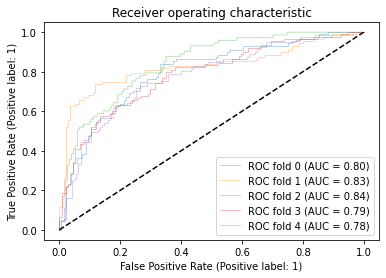

accuracy : 0.6464285714285715
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       136
           1       0.75      0.44      0.56        88

    accuracy                           0.72       224
   macro avg       0.73      0.67      0.68       224
weighted avg       0.73      0.72      0.70       224

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       136
           1       0.92      0.55      0.69        88

    accuracy                           0.80       224
   macro avg       0.85      0.76      0.77       224
weighted avg       0.83      0.80      0.79       224

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       151
           1       0.66      0.60   

In [2]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn import svm
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold


# Import some data to play with
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = svm.SVC(probability=True)
history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\other_models\\svm_other', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    # Store model in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and Accurracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    # Plot ROC
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\other\\svm_other_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.61      0.89      0.72       145
           1       0.76      0.39      0.51       135

    accuracy                           0.65       280
   macro avg       0.69      0.64      0.62       280
weighted avg       0.68      0.65      0.62       280

0.6464285714285715


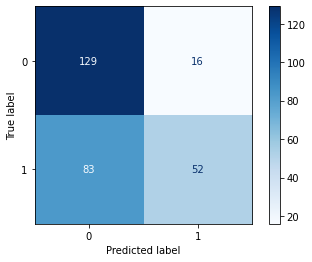

In [3]:
from sklearn.metrics import plot_confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\other\\svm_other_matrix.jpg')

Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.7008928571428571
log_loss : 3.8844317440553615

=========================Fold 2=========================
accuracy_score : 0.7098214285714286
log_loss : 3.6116052452604004

=========================Fold 3=========================
accuracy_score : 0.78125
log_loss : 2.817351618569237

=========================Fold 4=========================
accuracy_score : 0.7410714285714286
log_loss : 2.9697929682129023

=========================Fold 5=========================
accuracy_score : 0.7142857142857143
log_loss : 2.1307647523671784



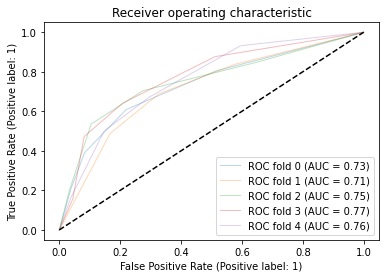

accuracy : 0.7107142857142857
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       132
           1       0.77      0.39      0.52        92

    accuracy                           0.70       224
   macro avg       0.72      0.65      0.65       224
weighted avg       0.72      0.70      0.67       224

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       144
           1       0.62      0.49      0.55        80

    accuracy                           0.71       224
   macro avg       0.68      0.66      0.67       224
weighted avg       0.70      0.71      0.70       224

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       153
           1       0.70      0.54   

In [4]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Import some data to play with
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = KNeighborsClassifier(n_neighbors=4)
history = []


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\other_models\\knn_other', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    # Store model report in history list
    history.append(classification_report(y_val,predict))
    
    
    # Continue Predict, Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    # Plot ROC
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\other\\knn_other_graph.jpg')
plt.show()

predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.65      0.94      0.77       145
           1       0.88      0.47      0.61       135

    accuracy                           0.71       280
   macro avg       0.76      0.70      0.69       280
weighted avg       0.76      0.71      0.69       280

0.7107142857142857


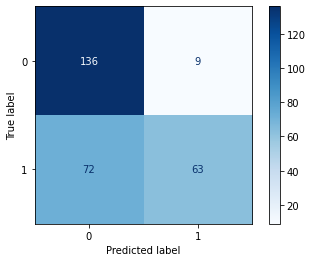

In [5]:
from sklearn.metrics import plot_confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\other\\knn_other_matrix.jpg')

Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.7901785714285714
log_loss : 0.6544869126013614

=========================Fold 2=========================
accuracy_score : 0.7633928571428571
log_loss : 0.5366133672097664

=========================Fold 3=========================
accuracy_score : 0.7455357142857143
log_loss : 0.5167657286237496

=========================Fold 4=========================
accuracy_score : 0.6919642857142857
log_loss : 0.595217383331774

=========================Fold 5=========================
accuracy_score : 0.6964285714285714
log_loss : 0.6287831783995157



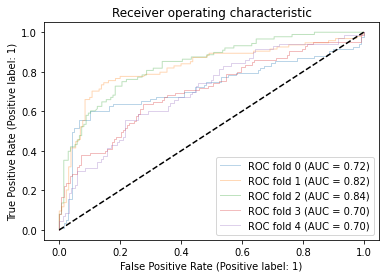

accuracy : 0.6892857142857143
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       141
           1       0.82      0.55      0.66        83

    accuracy                           0.79       224
   macro avg       0.80      0.74      0.75       224
weighted avg       0.80      0.79      0.78       224

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       130
           1       0.83      0.55      0.66        94

    accuracy                           0.76       224
   macro avg       0.78      0.73      0.74       224
weighted avg       0.78      0.76      0.75       224

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       136
           1       0.82      0.45   

In [6]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Import some data to play with
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = LogisticRegression(random_state=random_state)
history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\other_models\\lg_other', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    
    # Store model in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    # Plot ROC
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\other\\lg_other_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.65      0.87      0.74       145
           1       0.78      0.50      0.61       135

    accuracy                           0.69       280
   macro avg       0.71      0.68      0.67       280
weighted avg       0.71      0.69      0.68       280

0.6892857142857143


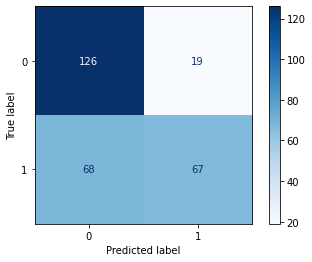

In [7]:
from sklearn.metrics import plot_confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\other\\lg_other_matrix.jpg')

Automatically created module for IPython interactive environment
=========================Fold 1=========================
accuracy_score : 0.7053571428571429
log_loss : 0.6166923291741041

=========================Fold 2=========================
accuracy_score : 0.7723214285714286
log_loss : 0.534457927662959

=========================Fold 3=========================
accuracy_score : 0.7098214285714286
log_loss : 0.6987490049972929

=========================Fold 4=========================
accuracy_score : 0.7410714285714286
log_loss : 0.8776065389757134

=========================Fold 5=========================
accuracy_score : 0.7098214285714286
log_loss : 0.6102551103135111



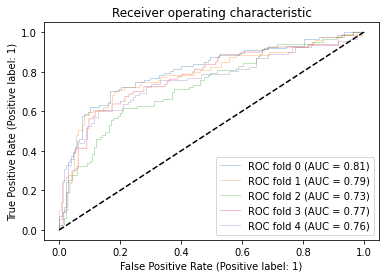

accuracy : 0.6214285714285714
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       137
           1       0.86      0.29      0.43        87

    accuracy                           0.71       224
   macro avg       0.77      0.63      0.62       224
weighted avg       0.75      0.71      0.66       224

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       145
           1       0.82      0.46      0.59        79

    accuracy                           0.77       224
   macro avg       0.79      0.70      0.71       224
weighted avg       0.78      0.77      0.75       224

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       141
           1       0.76      0.31   

In [8]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold


# Import some data to play with
X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,shuffle=True)


classifier = GaussianNB()
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    
    
    # Fit model
    classifier.fit(X_train, y_train)
    
    
    # Save model
    with open('Models\\other_models\\nb_other', 'wb') as f:
        pickle.dump(classifier, f)
    
    
    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)
    
    # Store model in history list
    history.append(classification_report(y_val,predict))
    
    
    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'=========================Fold {i+1}=========================')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    
    
    # Plot ROC
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
    
ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('Graph\\other\\nb_other_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.58      0.96      0.72       145
           1       0.85      0.26      0.40       135

    accuracy                           0.62       280
   macro avg       0.72      0.61      0.56       280
weighted avg       0.71      0.62      0.57       280

0.6214285714285714


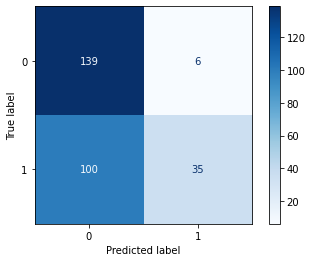

In [9]:
from sklearn.metrics import plot_confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues')
plt.savefig('Matrix\\other\\nb_other_matrix.jpg')